In [1]:
from pylab import *
import numpy as np
from os import listdir
from sklearn.svm import LinearSVC
import cv2
from PIL import Image
from sklearn import svm
import imagehash
from scipy.cluster.vq import *
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import linear_model

In [2]:
genuine_image_filenames = listdir("trainingSet/OfflineSignatures/Dutch/TrainingSet/Offline Genuine")
forged_image_filenames = listdir("trainingSet/OfflineSignatures/Dutch/TrainingSet/Offline Forgeries")

genuine_image_paths = "trainingSet/OfflineSignatures/Dutch/TrainingSet/Offline Genuine"
forged_image_paths = "trainingSet/OfflineSignatures/Dutch/TrainingSet/Offline Forgeries"

train_X=[]
train_Y=[]
for im in genuine_image_filenames:
    image_path = genuine_image_paths + "/" + im
    img=cv2.imread(image_path)
    train_X.append(img)
    train_Y.append(1)

for im in forged_image_filenames:
    image_path = forged_image_paths + "/" + im
    img=cv2.imread(image_path)
    train_X.append(img)
    train_Y.append(0)
    
print(np.shape(train_X))
print(np.shape(train_Y))

(362,)
(362,)


In [3]:
np.shape(train_X[0])

(359, 725, 3)

In [4]:
train_X_new=[]
for i in train_X:
    train_X_new.append(cv2.cvtColor(i, cv2.COLOR_BGR2GRAY))
    
train_X_final=[]
for i in train_X_new:
    img=cv2.resize(i, (120,120), interpolation = cv2.INTER_AREA)
    train_X_final.append(img)

In [5]:
np.shape(train_X_final)

(362, 120, 120)

In [6]:
def img_to_1d_greyscale(img):
    # function for loading, resizing and converting an image into greyscale
    # used for logistic regression
    return(pd.Series(img.flatten()))


In [7]:
import pandas as pd
size = (120, 120)

# defining empty containers
X_train = pd.DataFrame(np.zeros((362, size[0] * size[1])))
#X_test = pd.DataFrame(np.zeros((362, size[0] * size[1])))

In [8]:
counter_train = 0

for i in range(len(train_X_final)):
    X_train.iloc[counter_train, :] = img_to_1d_greyscale(train_X_final[i]) / 255
    counter_train += 1

In [9]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,14390,14391,14392,14393,14394,14395,14396,14397,14398,14399
0,0.984314,0.984314,0.984314,0.984314,0.980392,0.980392,0.984314,0.984314,0.980392,0.980392,...,0.980392,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314
1,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,...,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314
2,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,...,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314
3,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,...,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314
4,0.984314,0.984314,0.984314,0.984314,0.980392,0.980392,0.984314,0.984314,0.984314,0.984314,...,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314
5,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,...,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314
6,0.984314,0.980392,0.984314,0.980392,0.984314,0.984314,0.980392,0.976471,0.980392,0.984314,...,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314
7,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,...,0.984314,0.984314,0.984314,0.984314,0.984314,0.980392,0.984314,0.980392,0.984314,0.984314
8,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,...,0.980392,0.984314,0.980392,0.984314,0.984314,0.976471,0.980392,0.984314,0.984314,0.984314
9,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,0.984314,...,0.984314,0.984314,0.984314,0.984314,0.980392,0.984314,0.984314,0.984314,0.984314,0.984314


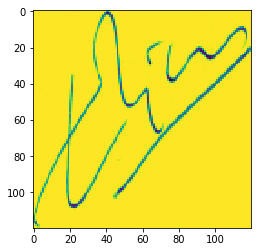

In [10]:
plt.imshow(np.reshape(X_train.iloc[3, ].values, size))

In [11]:
X_train.loc[0,:]

0        0.984314
1        0.984314
2        0.984314
3        0.984314
4        0.980392
5        0.980392
6        0.984314
7        0.984314
8        0.980392
9        0.980392
10       0.984314
11       0.984314
12       0.984314
13       0.980392
14       0.984314
15       0.984314
16       0.984314
17       0.984314
18       0.984314
19       0.984314
20       0.984314
21       0.984314
22       0.984314
23       0.984314
24       0.984314
25       0.980392
26       0.984314
27       0.984314
28       0.984314
29       0.984314
           ...   
14370    0.984314
14371    0.984314
14372    0.984314
14373    0.984314
14374    0.984314
14375    0.984314
14376    0.984314
14377    0.984314
14378    0.984314
14379    0.984314
14380    0.984314
14381    0.984314
14382    0.984314
14383    0.984314
14384    0.984314
14385    0.984314
14386    0.984314
14387    0.984314
14388    0.984314
14389    0.984314
14390    0.980392
14391    0.984314
14392    0.984314
14393    0.984314
14394    0

In [13]:
from sklearn.linear_model import LogisticRegression 

In [14]:
logreg_classifier = LogisticRegression(solver = 'lbfgs')
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
train_X,valid_X,train_label,valid_label = train_test_split(X_train, train_Y, test_size=0.2, random_state=13)

In [15]:
print(len(train_label))
print(len(valid_label))

289
73


In [16]:
logreg_classifier.fit(train_X,train_label)

C:\Users\Saurav\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
logreg_pred = logreg_classifier.predict(valid_X)

In [18]:
logreg_pred.shape

(73,)

In [19]:
def pretty_cm(y_pred, y_truth, labels):
    # pretty implementation of a confusion matrix
    cm = metrics.confusion_matrix(y_truth, y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'BuGn_r')
    # labels, title and ticks
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('Actual label')
    ax.set_title('Accuracy: {0}'.format(metrics.accuracy_score(y_truth, y_pred)), size = 15) 
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)

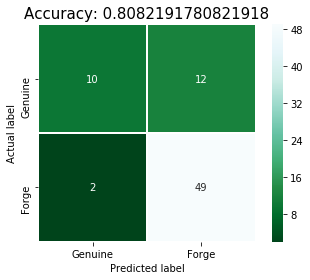

In [20]:
pretty_cm(logreg_pred, valid_label, ['Genuine', 'Forge'])

In [21]:
score=metrics.accuracy_score(valid_label,logreg_pred)

In [22]:
score

0.8082191780821918

# Naive Bayes 

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
nb=MultinomialNB()

In [25]:
nb.fit(train_X,train_label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
nb_pred = nb.predict(valid_X)

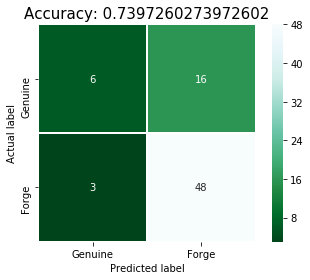

In [27]:
pretty_cm(nb_pred, valid_label, ['Genuine', 'Forge'])

In [28]:
score=metrics.accuracy_score(valid_label,nb_pred)

In [29]:
score

0.7397260273972602